In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/cubic.csv")

In [ ]:
a = df.loc[:, ['space_group','total atom number',
'maximum atom number',
'minimum atom number',
'average atom number',
'specific value',
'atom number variance',
'mean NpValence',
'2-norm',
'3-norm',
'5-norm',
'7-norm',
'10-norm',
'mean CovalentRadius',
'frac p valence electrons',
'avg_dev NpValence',
'mean Electronegativity',
'mean GSbandgap',
'maximum Electronegativity',
'avg_dev GSbandgap',
'band center']]

In [ ]:
a

,space_group,total atom number,maximum atom number,minimum atom number,average atom number,specific value,atom number variance,mean NpValence,2-norm,3-norm,...,7-norm,10-norm,mean CovalentRadius,frac p valence electrons,avg_dev NpValence,mean Electronegativity,mean GSbandgap,maximum Electronegativity,avg_dev GSbandgap,band center
0,195,49,28,1,9.800000,1.0,0.036718,2.734694,0.619347,0.579513,...,0.571445,0.571429,95.367347,0.598214,1.497709,2.600000,0.139592,3.44,0.239300,-2.340552
1,195,46,24,1,7.666667,1.0,0.028460,2.695652,0.580886,0.533379,...,0.521782,0.521740,98.391304,0.568807,1.561437,2.547391,0.186696,3.44,0.308454,-2.285109
2,195,46,24,1,7.666667,1.0,0.028460,2.695652,0.580886,0.533379,...,0.521782,0.521740,98.804348,0.568807,1.561437,2.540870,0.178109,3.44,0.294267,-2.279807
3,195,66,40,1,22.000000,1.0,0.059229,3.560606,0.714856,0.651840,...,0.609236,0.606610,98.060606,0.241521,0.532599,2.877727,0.000000,3.44,0.000000,-2.785011
4,195,66,40,1,22.000000,1.0,0.059229,3.560606,0.714856,0.651840,...,0.609236,0.606610,97.969697,0.241273,0.532599,2.878485,0.000000,3.44,0.000000,-2.786148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17362,230,160,96,16,40.000000,8.0,0.041250,2.550000,0.644205,0.607092,...,0.600011,0.600000,104.300000,0.346939,1.740000,2.651500,0.000000,3.44,0.000000,-2.431185
17363,230,160,96,16,40.000000,8.0,0.041250,2.700000,0.644205,0.607092,...,0.600011,0.600000,91.300000,0.529412,1.560000,2.711500,0.115950,3.44,0.197115,-2.531335
17364,230,160,96,16,40.000000,8.0,0.041250,2.800000,0.644205,0.607092,...,0.600011,0.600000,92.650000,0.373333,1.440000,2.864000,0.115950,3.44,0.197115,-2.756560
17365,230,232,96,16,58.000000,8.0,0.026977,1.655172,0.598254,0.523101,...,0.456867,0.443492,69.413793,0.452830,1.940547,2.558276,3.249517,3.44,3.809779,-2.396139


<Axes: >

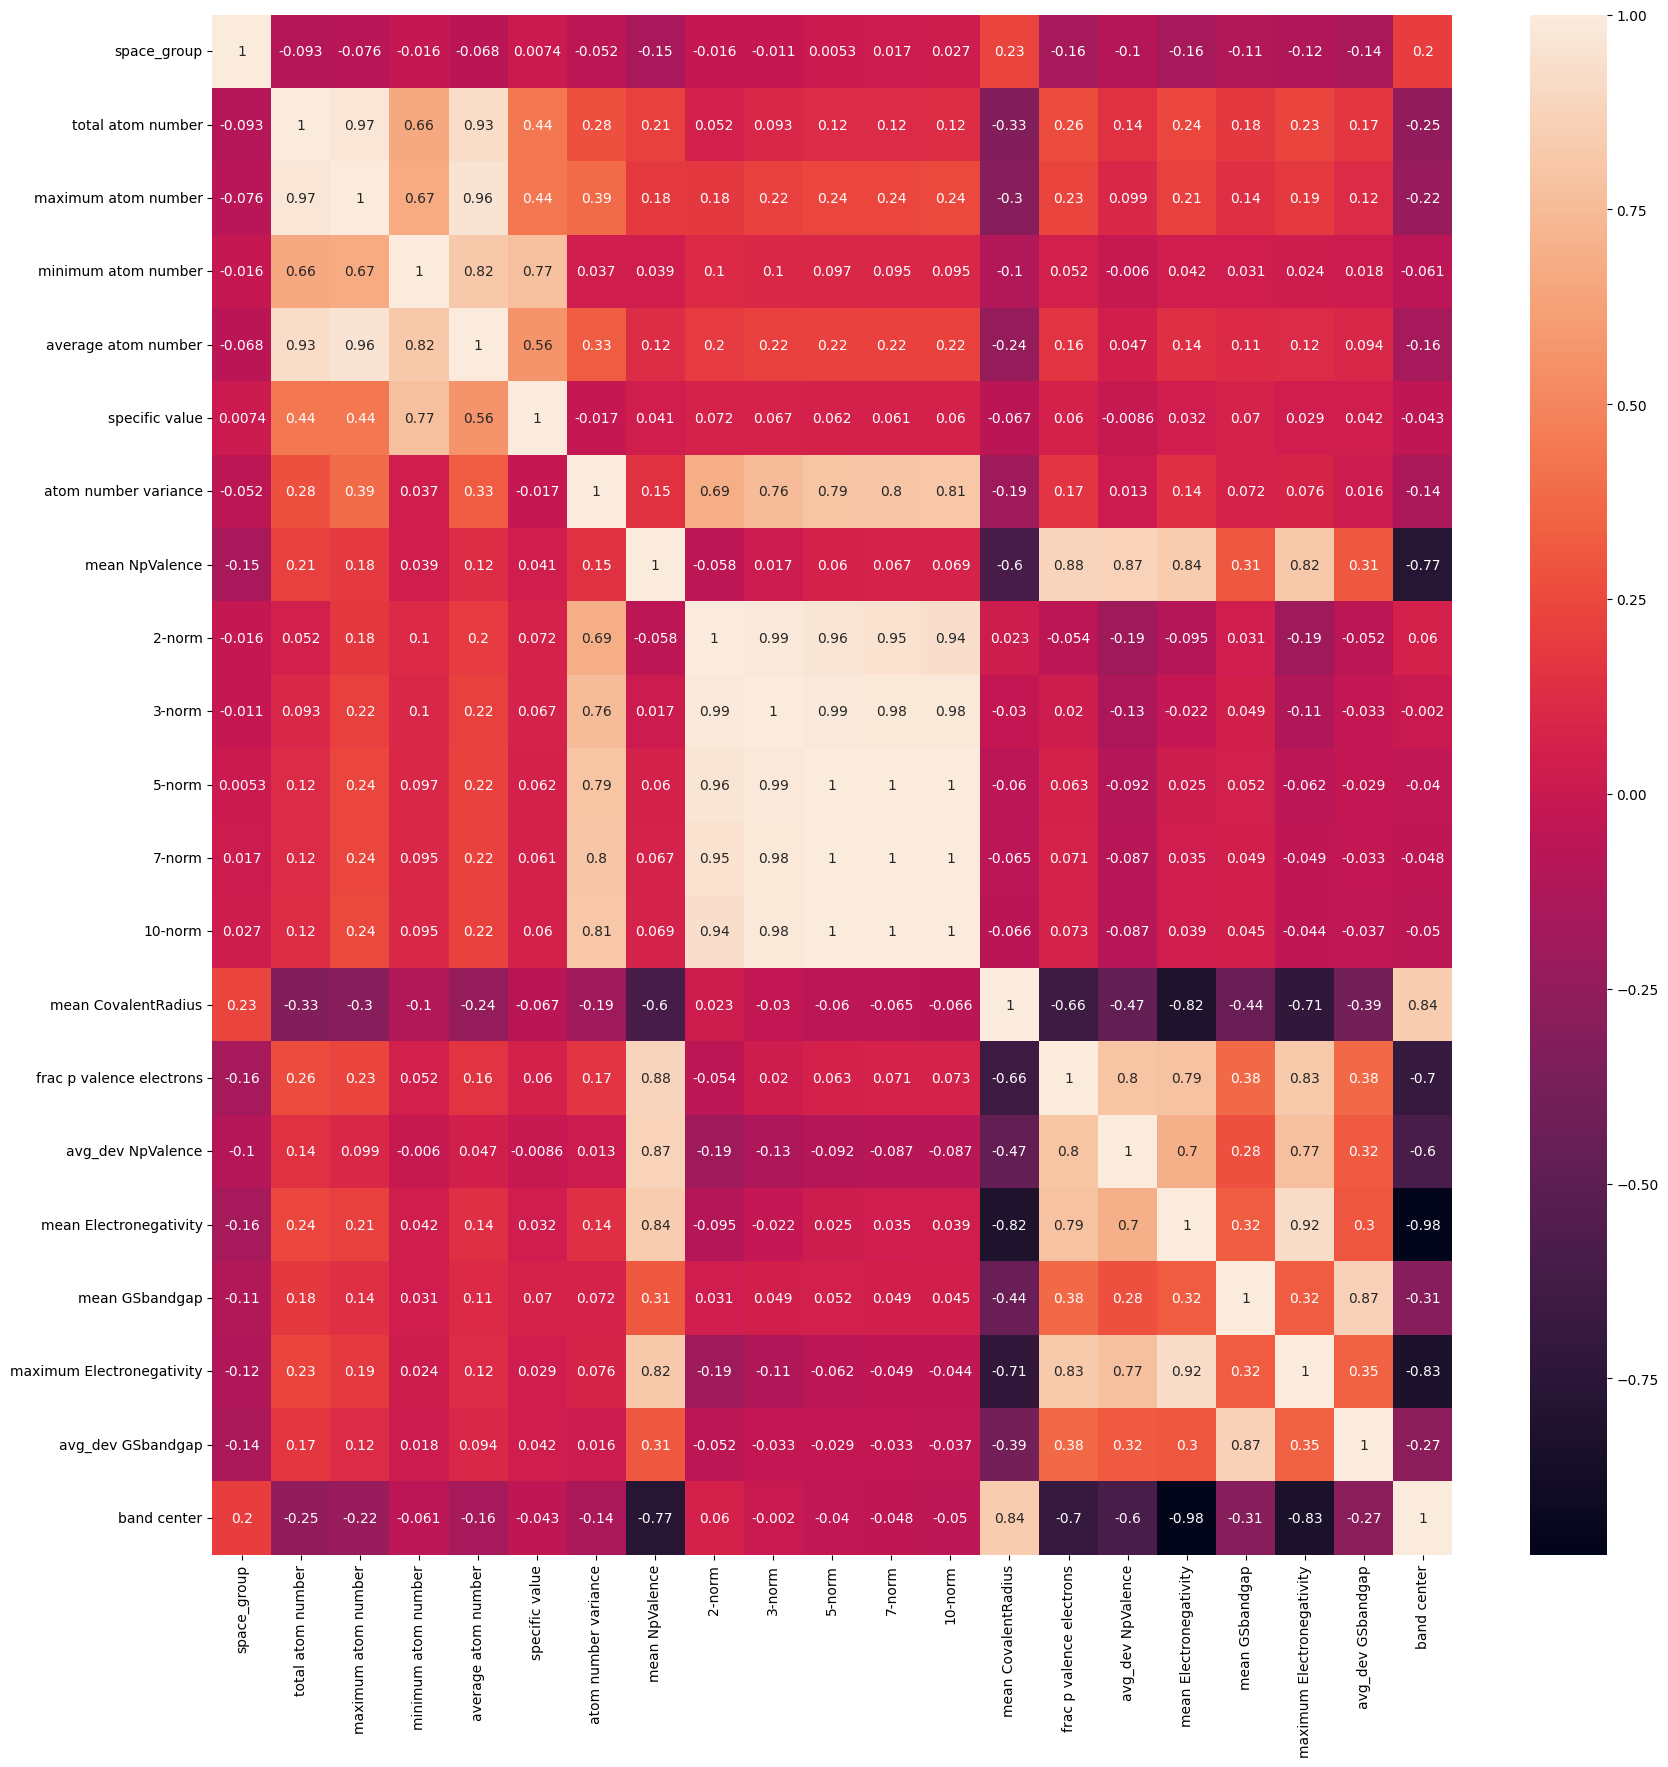

In [ ]:
figure=plt.figure(figsize=(20,20))
corr = a.corr()
sns.heatmap(corr, annot=True)

In [ ]:
b = a.drop(['average atom number','mean NpValence','2-norm','3-norm','5-norm','7-norm','10-norm','frac p valence electrons','avg_dev NpValence','mean GSbandgap','maximum Electronegativity','band center'],axis=1)
b

,space_group,total atom number,maximum atom number,minimum atom number,specific value,atom number variance,mean CovalentRadius,mean Electronegativity,avg_dev GSbandgap
0,195,49,28,1,1.0,0.036718,95.367347,2.600000,0.239300
1,195,46,24,1,1.0,0.028460,98.391304,2.547391,0.308454
2,195,46,24,1,1.0,0.028460,98.804348,2.540870,0.294267
3,195,66,40,1,1.0,0.059229,98.060606,2.877727,0.000000
4,195,66,40,1,1.0,0.059229,97.969697,2.878485,0.000000
...,...,...,...,...,...,...,...,...,...
17362,230,160,96,16,8.0,0.041250,104.300000,2.651500,0.000000
17363,230,160,96,16,8.0,0.041250,91.300000,2.711500,0.197115
17364,230,160,96,16,8.0,0.041250,92.650000,2.864000,0.197115
17365,230,232,96,16,8.0,0.026977,69.413793,2.558276,3.809779


**Random Forest**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, matthews_corrcoef, make_scorer
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

# cubic data are as follows
r=b.drop(['space_group'], axis=1).fillna(0).values
s=b['space_group'].fillna(0).values

p = np.random.permutation(range(len(r)))
r, s = r[p], s[p]  # Disrupt the order of data

forest = RandomForestClassifier(criterion='entropy', n_estimators=100, max_features=80, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_jobs=-1)

scoring = {
    'accuracy': 'accuracy',
    'f1_weighted': 'f1_weighted',
    'MCC': make_scorer(matthews_corrcoef),
}

scores = cross_validate(forest, r, s, scoring=scoring, cv=10)

accuracy = scores['test_accuracy']
mcc = scores['test_MCC']
f1_weighted = scores['test_f1_weighted']

print('accuracy   :', '%.3f' % np.mean(accuracy), '+-', '%.3f' % np.std(accuracy, ddof=1))
print('test_MCC   :', '%.3f' % np.mean(mcc), '+-', '%.3f' % np.std(mcc, ddof=1))
print('f1_weighted:', '%.3f' % np.mean(f1_weighted), '+-', '%.3f' % np.std(f1_weighted, ddof=1))


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(


accuracy   : 0.950 +- 0.005
test_MCC   : 0.930 +- 0.007
f1_weighted: 0.949 +- 0.005


In [ ]:
from sklearn.model_selection import train_test_split
seed=1000
r=b.drop(['space_group'], axis=1).fillna(0).values
s=b['space_group'].fillna(0).values
np.random.seed(seed)
X_train,X_test,y_train, y_test=train_test_split(r, s, test_size=0.30)

forest.fit(X_train,y_train)
y_pred_train=forest.predict(X_train)
y_pred_test=forest.predict(X_test)
corr_train=np.corrcoef(y_train, y_pred_train) [0,1]
print('Training Data Rˆ2=',round(corr_train**2,4),'R=',round(corr_train,4))

corr_test=np.corrcoef(y_test, y_pred_test) [0,1]
print('Testing Data Rˆ2=',round(corr_test**2,4),'R=',round(corr_test,4))

Training Data Rˆ2= 1.0 R= 1.0
Testing Data Rˆ2= 0.7774 R= 0.8817


Accuracy Score: 0.9445403953175974
Confusion Matrix:
              precision    recall  f1-score   support

         195       1.00      0.50      0.67         2
         196       0.00      0.00      0.00         1
         197       0.94      0.88      0.91        17
         198       0.82      0.82      0.82       109
         199       0.86      0.60      0.71        10
         200       0.95      0.82      0.88        22
         201       0.90      0.60      0.72        15
         202       0.91      0.77      0.83        13
         203       1.00      0.84      0.91        19
         204       0.95      0.93      0.94        92
         205       0.68      0.83      0.75        72
         206       0.90      0.71      0.79        38
         208       1.00      0.50      0.67         2
         212       0.70      0.70      0.70        20
         213       0.62      0.53      0.57        15
         214       1.00      0.94      0.97        17
         215       0.86     

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1

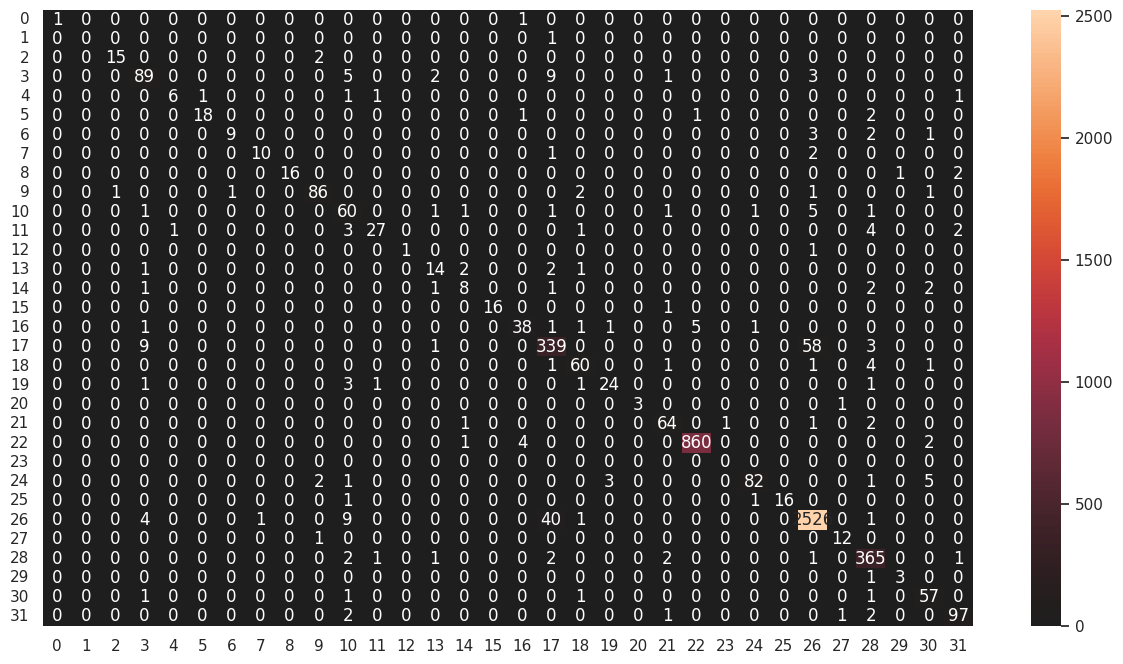

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#label = ['195','197','198','199','200','201','202','203','204','205','206','208','212','213','214','215','216']
cm=confusion_matrix(y_test, y_pred_test)
print('Accuracy Score:',accuracy_score(y_test, y_pred_test))
print('Confusion Matrix:')
#print(cm)
print(classification_report(y_test, y_pred_test))
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(cm,center=True,annot=True,fmt='g')
#sns.heatmap(cm,center=True, annot=True, cmap='viridis',linewidths=3, linecolor='black')#xticklabels=label, yticklabels=label
plt.show()

Text(0.5, 1.0, 'Feature Importance Ranking')

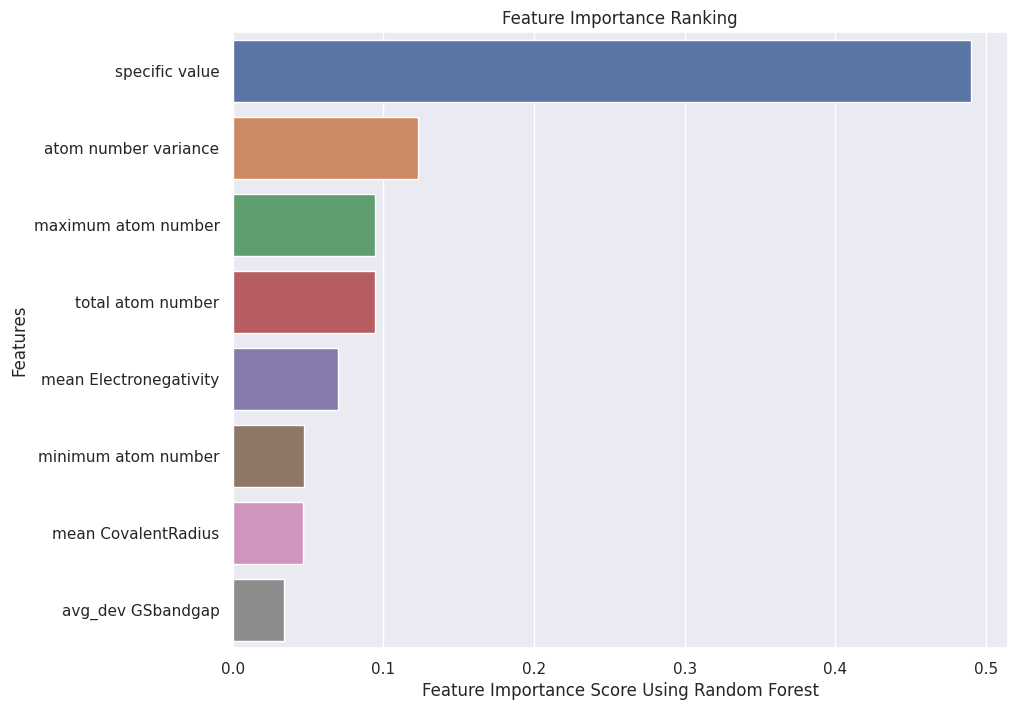

In [ ]:
forest.fit(X_test,y_pred_test)
feature_names=b.iloc[:,1:].columns
plt.figure(figsize=(10,8))
feature_imp=pd.Series(forest.feature_importances_,index=feature_names).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score Using Random Forest')
plt.ylabel('Features')
plt.title("Feature Importance Ranking")

**Extra Trees**

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
np.random.seed(seed)
etc= ExtraTreesClassifier(criterion='entropy', n_estimators=100, max_features=80, max_depth=None, min_samples_leaf=1, min_samples_split=2,n_jobs=-1,bootstrap=False)
etc.fit(X_train,y_train)
y_pred_train_etc=etc.predict(X_train)
y_pred_test_etc=etc.predict(X_test)

corr_train=np.corrcoef(y_train, y_pred_train_etc) [0,1]
print('Training Data Rˆ2=',round(corr_train**2,4),'R=',round(corr_train,4))

corr_test=np.corrcoef(y_test, y_pred_test_etc) [0,1]
print('Testing Data Rˆ2=',round(corr_test**2,4),'R=',round(corr_test,4))

Training Data Rˆ2= 1.0 R= 1.0
Testing Data Rˆ2= 0.8078 R= 0.8987


Accuracy Score: 0.9516407599309153
Confusion Matrix:
              precision    recall  f1-score   support

         195       1.00      0.50      0.67         2
         196       0.00      0.00      0.00         1
         197       0.89      0.94      0.91        17
         198       0.85      0.80      0.82       109
         199       0.78      0.70      0.74        10
         200       0.90      0.86      0.88        22
         201       1.00      0.80      0.89        15
         202       0.86      0.92      0.89        13
         203       1.00      0.84      0.91        19
         204       0.96      0.96      0.96        92
         205       0.73      0.79      0.76        72
         206       0.85      0.74      0.79        38
         208       1.00      0.50      0.67         2
         212       0.74      0.70      0.72        20
         213       0.69      0.60      0.64        15
         214       0.94      1.00      0.97        17
         215       0.85     

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


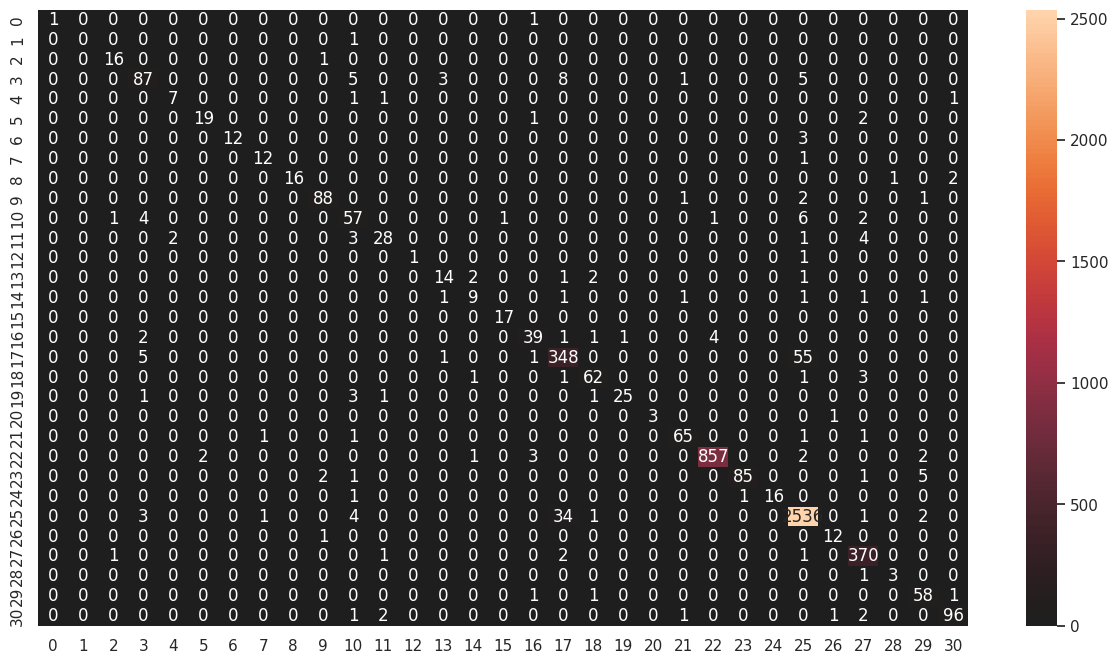

In [ ]:
#label = ['195','197','198','199','200','201','202','203','204','205','206','208','212','213','214','215','216']
cm=confusion_matrix(y_test, y_pred_test_etc)
print('Accuracy Score:',accuracy_score(y_test, y_pred_test_etc))
print('Confusion Matrix:')
#print(cm)
print(classification_report(y_test, y_pred_test_etc))
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(cm,center=True,annot=True,fmt='g')
#sns.heatmap(cm,center=True, annot=True,linewidths=3, linecolor='black')#xticklabels=label, yticklabels=label
plt.show()

Text(0.5, 1.0, 'Feature Importance Ranking')

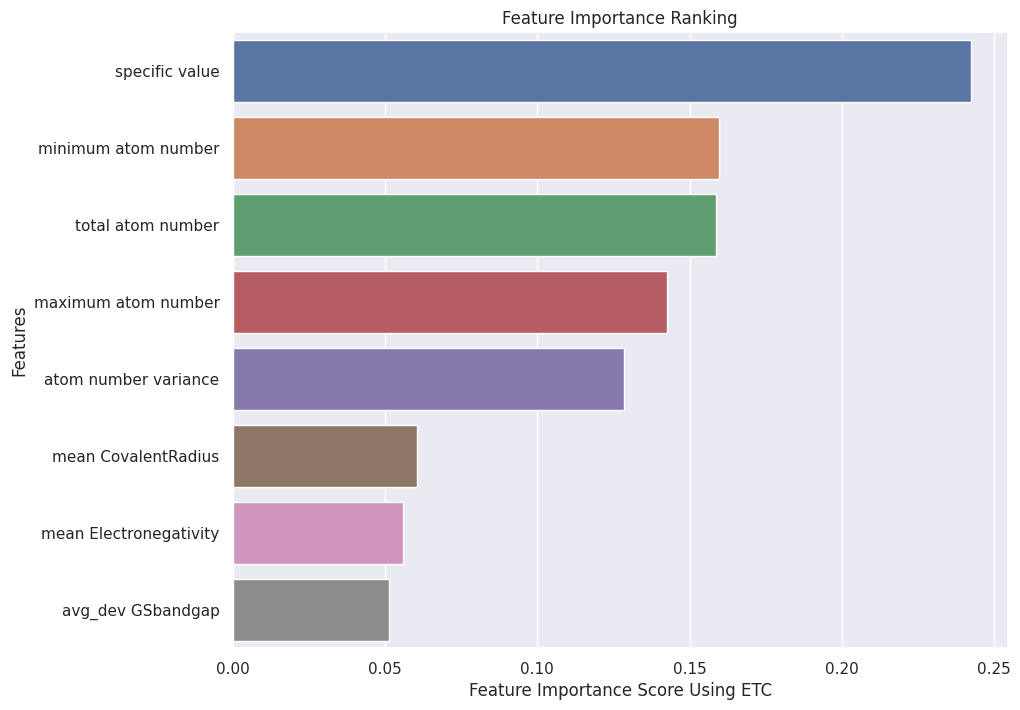

In [ ]:
etc.fit(X_test,y_pred_test_etc)
feature_names=b.iloc[:,1:].columns
plt.figure(figsize=(10,8))
feature_imp=pd.Series(etc.feature_importances_,index=feature_names).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score Using ETC')
plt.ylabel('Features')
plt.title("Feature Importance Ranking")

**SVM**

In [ ]:
from sklearn import preprocessing
scaler=preprocessing.MinMaxScaler(feature_range=(0,1))
scaler.fit(b)
b_scaled=scaler.transform(b)
b_scaled=pd.DataFrame(b, columns=b.columns)

In [ ]:
from sklearn.model_selection import train_test_split
seed=1000
t=b_scaled.drop(['space_group'], axis=1).fillna(0).values
u=b_scaled['space_group'].fillna(0).values
np.random.seed(seed)
X_train_svm,X_test_svm,y_train_svm, y_test_svm=train_test_split(t, u, test_size=0.30)

In [ ]:

from sklearn.linear_model import SGDClassifier  
svm = SGDClassifier(loss='hinge')
svm.fit(X_train_svm,y_train_svm)
y_pred_train_svm=svm.predict(X_train_svm)
y_pred_test_svm=svm.predict(X_test_svm)

corr_train=np.corrcoef(y_train_svm, y_pred_train_svm) [0,1]
print('Training Data Rˆ2=',round(corr_train**2,4),'R=',round(corr_train,4))

corr_test=np.corrcoef(y_test_svm, y_pred_test_svm) [0,1]
print('Testing Data Rˆ2=',round(corr_test**2,4),'R=',round(corr_test,4))

Training Data Rˆ2= 0.038 R= 0.1949
Testing Data Rˆ2= 0.0428 R= 0.2069


Accuracy Score: 0.6399923239301477
Confusion Matrix:
              precision    recall  f1-score   support

         195       0.00      0.00      0.00         2
         196       0.00      0.00      0.00         1
         197       0.00      0.00      0.00        17
         198       0.00      0.00      0.00       109
         199       0.00      0.00      0.00        10
         200       0.00      0.00      0.00        22
         201       0.00      0.00      0.00        15
         202       0.00      0.00      0.00        13
         203       0.00      0.00      0.00        19
         204       0.00      0.00      0.00        92
         205       0.10      0.32      0.16        72
         206       0.00      0.00      0.00        38
         208       0.00      0.00      0.00         2
         212       0.00      0.00      0.00        20
         213       0.00      0.00      0.00        15
         214       0.00      0.00      0.00        17
         215       0.00     

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


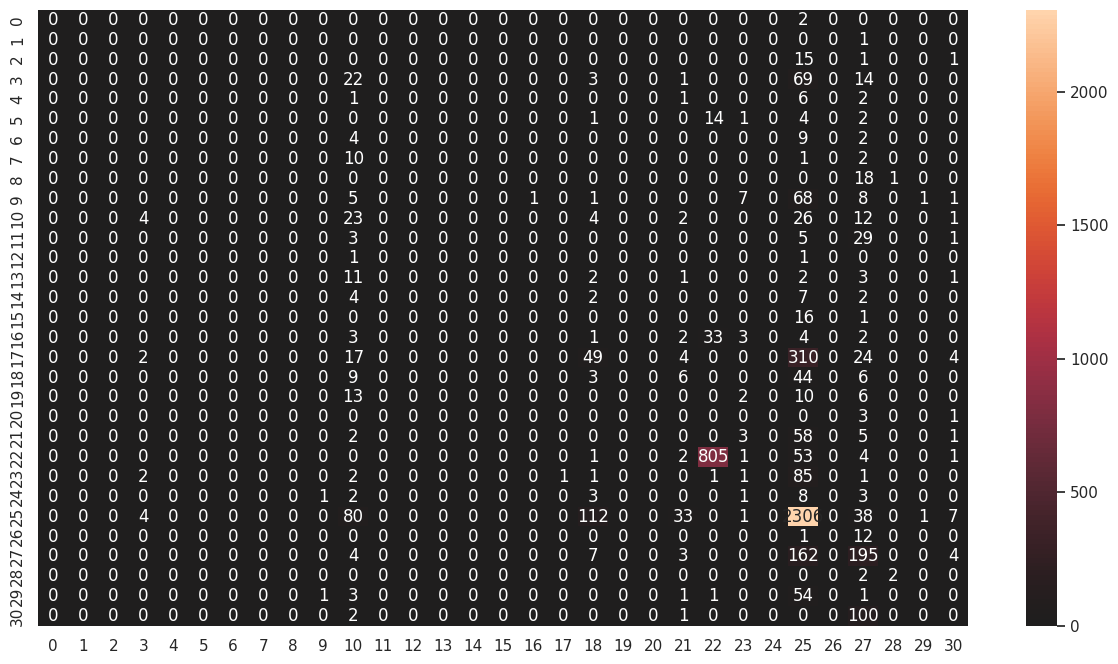

In [ ]:
#label = ['195','197','198','199','200','201','202','203','204','205','206','208','212','213','214','215','216']
cm=confusion_matrix(y_test_svm, y_pred_test_svm)
print('Accuracy Score:',accuracy_score(y_test_svm, y_pred_test_svm))
print('Confusion Matrix:')
#print(cm)
print(classification_report(y_test_svm, y_pred_test_svm))
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(cm,center=True,annot=True,fmt='g')
#sns.heatmap(cm,center=True, annot=True,linewidths=3, linecolor='black')#xticklabels=label, yticklabels=label
plt.show()

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
np.random.seed(seed)
KNN=KNeighborsClassifier(n_neighbors=3, metric='euclidean')
KNN.fit(X_train,y_train)
y_pred_train_KNN=KNN.predict(X_train)
y_pred_test_KNN=KNN.predict(X_test)
corr_train=np.corrcoef(y_train, y_pred_train_KNN) [0,1]
print('Training Data Rˆ2=',round(corr_train**2,4),'R=',round(corr_train,4))

corr_test=np.corrcoef(y_test, y_pred_test_KNN) [0,1]
print('Testing Data Rˆ2=',round(corr_test**2,4),'R=',round(corr_test,4))

Training Data Rˆ2= 0.784 R= 0.8854
Testing Data Rˆ2= 0.6251 R= 0.7906


Accuracy Score: 0.9065438495490309
Confusion Matrix:
              precision    recall  f1-score   support

         195       0.00      0.00      0.00         2
         196       0.00      0.00      0.00         1
         197       0.88      0.82      0.85        17
         198       0.53      0.58      0.55       109
         199       0.18      0.30      0.22        10
         200       0.86      0.55      0.67        22
         201       0.64      0.60      0.62        15
         202       0.69      0.69      0.69        13
         203       0.94      0.79      0.86        19
         204       0.89      0.89      0.89        92
         205       0.56      0.62      0.59        72
         206       0.66      0.61      0.63        38
         208       0.00      0.00      0.00         2
         209       0.00      0.00      0.00         0
         212       0.52      0.55      0.54        20
         213       0.36      0.27      0.31        15
         214       0.71     

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1

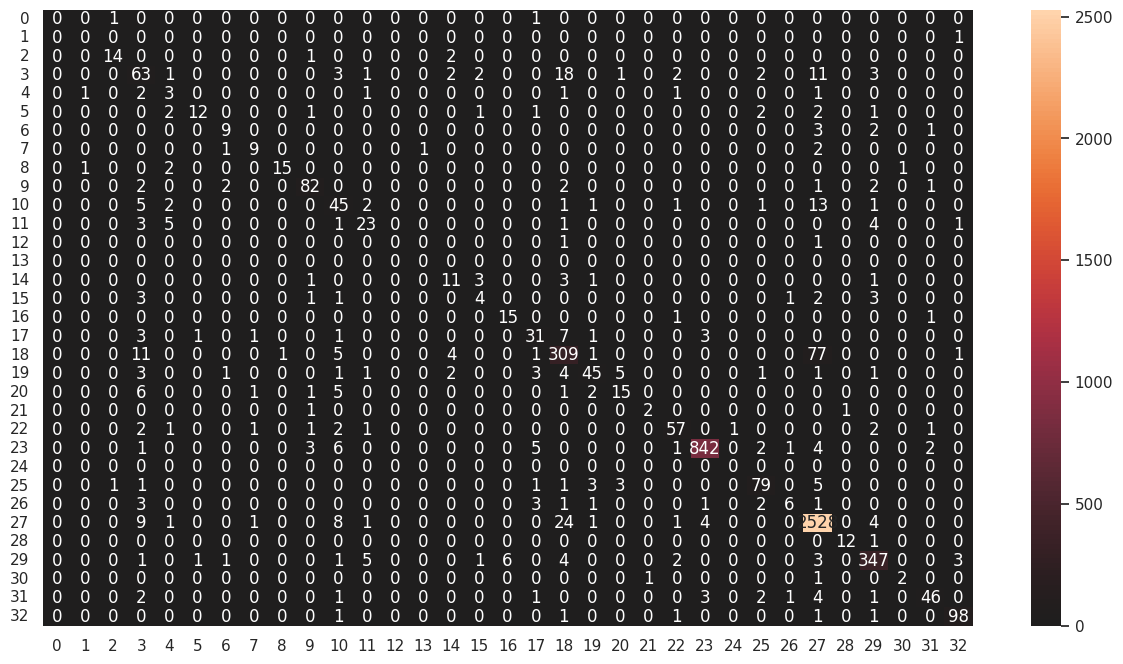

In [ ]:
#label = ['195','197','198','199','200','201','202','203','204','205','206','208','212','213','214','215','216']
cm=confusion_matrix(y_test, y_pred_test_KNN)
print('Accuracy Score:',accuracy_score(y_test, y_pred_test_KNN))
print('Confusion Matrix:')
#print(cm)
print(classification_report(y_test, y_pred_test_KNN))
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(cm,center=True,annot=True,fmt='g')
#sns.heatmap(cm,center=True, annot=True,linewidths=3, linecolor='black')#xticklabels=label, yticklabels=label
plt.show()

**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='entropy', max_features=80, max_depth=None, min_samples_leaf=1, min_samples_split=2)
dt.fit(X_train,y_train)
y_pred_train_dt=dt.predict(X_train)
y_pred_test_dt=dt.predict(X_test)
corr_train=np.corrcoef(y_train, y_pred_train_dt) [0,1]
print('Training Data Rˆ2=',round(corr_train**2,4),'R=',round(corr_train,4))

corr_test=np.corrcoef(y_test, y_pred_test_dt) [0,1]
print('Testing Data Rˆ2=',round(corr_test**2,4),'R=',round(corr_test,4))

Training Data Rˆ2= 1.0 R= 1.0
Testing Data Rˆ2= 0.7426 R= 0.8617


Accuracy Score: 0.9334100940318557
Confusion Matrix:
              precision    recall  f1-score   support

         195       1.00      0.50      0.67         2
         196       0.00      0.00      0.00         1
         197       0.94      0.94      0.94        17
         198       0.84      0.80      0.82       109
         199       0.60      0.60      0.60        10
         200       0.78      0.82      0.80        22
         201       0.73      0.53      0.62        15
         202       0.64      0.54      0.58        13
         203       1.00      0.79      0.88        19
         204       0.94      0.91      0.93        92
         205       0.66      0.81      0.73        72
         206       0.82      0.74      0.78        38
         208       1.00      0.50      0.67         2
         212       0.58      0.70      0.64        20
         213       0.67      0.53      0.59        15
         214       0.94      1.00      0.97        17
         215       0.83     

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1

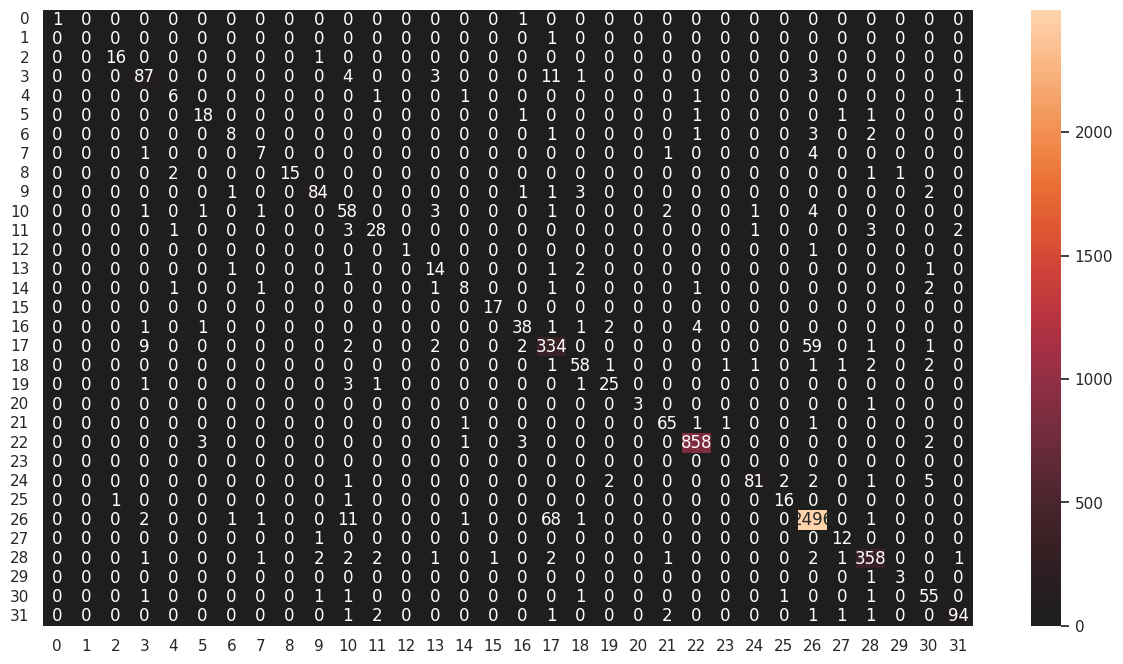

In [ ]:
#figure=plt.figure(figsize=(10,10))
#label = ['195','197','198','199','200','201','202','203','204','205','206','208','212','213','214','215','216']
cm=confusion_matrix(y_test, y_pred_test_dt)
print('Accuracy Score:',accuracy_score(y_test, y_pred_test_dt))
print('Confusion Matrix:')
#print(cm)
print(classification_report(y_test, y_pred_test_dt))
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(cm,center=True,annot=True,fmt='g')
#sns.heatmap(cm,center=True, annot=True,linewidths=3, linecolor='black')#xticklabels=label, yticklabels=label
plt.show()

Text(0.5, 1.0, 'Feature Importance Ranking')

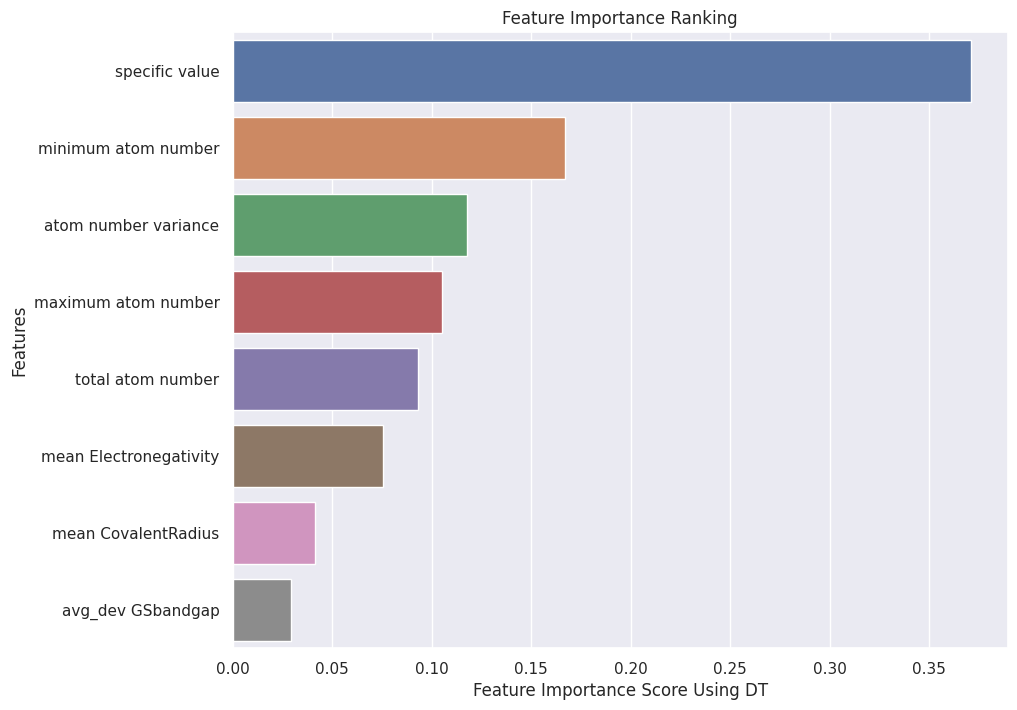

In [ ]:
dt.fit(X_test,y_pred_test_dt)
feature_names=b.iloc[:,1:].columns
plt.figure(figsize=(10,8))
feature_imp=pd.Series(dt.feature_importances_,index=feature_names).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score Using DT')
plt.ylabel('Features')
plt.title("Feature Importance Ranking")